In [1]:
import os

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
INPUT_DIR='/kaggle/input/kaist-ie343-2023-spring'

In [3]:
## Do not change this cell. 
## The reason for this is to prevent cheating using the original data from DACON. 
## If an assertion error occurs in that cell when TAs evaluate the submitted code of each student, it is considered cheating.

train = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
park = pd.read_csv(os.path.join(INPUT_DIR, 'park.csv'))
dcc = pd.read_csv(os.path.join(INPUT_DIR, 'day_care_center.csv'))

assert train.shape[0] == 329690 and train.shape[1] == 13, 'Do not change the format of the input data.'
assert test.shape[0] == 85097 and test.shape[1] == 12, 'Do not change the format of the input data.'
assert park.shape[0] == 1359 and park.shape[1] == 7, 'Do not change the format of the input data.'
assert dcc.shape[0] == 7373 and dcc.shape[1] == 10, 'Do not change the format of the input data.'

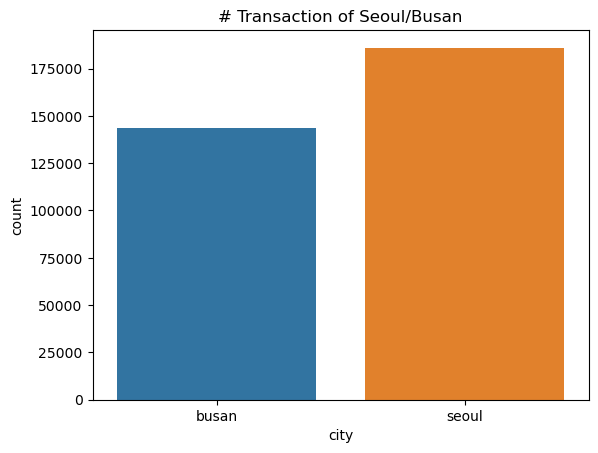

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='city', data=train)
plt.title('# Transaction of Seoul/Busan')
plt.show()

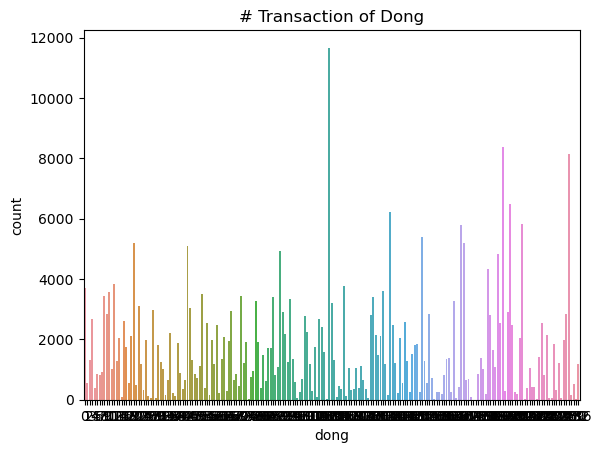

In [5]:
sns.countplot(x='dong', data = train)
plt.title('# Transaction of Dong')
plt.show()

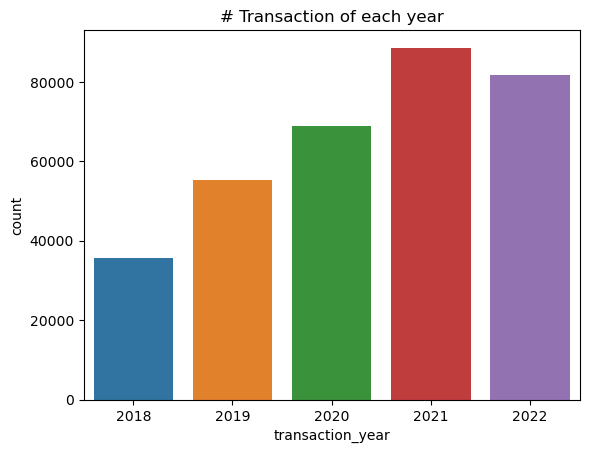

In [6]:
sns.countplot(x='transaction_year', data=train)
plt.title('# Transaction of each year')
plt.show()

In [7]:
import datetime
train['day'] = 0
train['transaction_d'] = 0
for row in range(len(train)):
    train.day[row] = str(train.transaction_day[row])[:-3]
    train.transaction_d[row] = 365*(train.transaction_year[row]-2000) + 30 * train.transaction_month[row] + int(train.day[row])
train.transaction_d

0         7886
1         7966
2         7411
3         7461
4         8231
          ... 
329685    8201
329686    7966
329687    8381
329688    7591
329689    7561
Name: transaction_d, Length: 329690, dtype: int64

In [8]:
test['day'] = 0
test['transaction_d'] = 0
for row in range(len(test)):
    test.day[row] = str(test.transaction_day[row])[:-3]
    test.transaction_d[row] = 365*(test.transaction_year[row]-2000) + 30 * test.transaction_month[row] + int(test.day[row])
test.transaction_d

0        8446
1        8456
2        8466
3        8476
4        8506
         ... 
85092    8716
85093    8716
85094    8726
85095    8746
85096    8746
Name: transaction_d, Length: 85097, dtype: int64

In [9]:
min_built = np.min(train['built_year'])
max_built = np.max(train['built_year'])
for yr in range(min_built, max_built+1, 1):
    print(yr, np.count_nonzero(train['built_year'] == yr))

1962 74
1963 0
1964 0
1965 0
1966 0
1967 0
1968 28
1969 25
1970 0
1971 46
1972 47
1973 86
1974 563
1975 472
1976 572
1977 672
1978 2745
1979 2943
1980 4168
1981 2888
1982 4465
1983 5212
1984 4229
1985 3430
1986 3464
1987 5422
1988 14905
1989 7850
1990 4512
1991 6576
1992 11091
1993 12336
1994 9293
1995 10731
1996 17663
1997 13533
1998 12580
1999 15021
2000 10307
2001 10499
2002 12295
2003 11907
2004 16560
2005 13265
2006 13393
2007 8160
2008 12837
2009 6280
2010 7231
2011 7575
2012 7623
2013 5187
2014 4708
2015 3004
2016 1217


In [10]:
train[(train['built_year'] == 1984) & (train['city'] == 'seoul')]['PRICE']

5150      2304940.0
5151      2658568.0
5152      3055060.0
5153      3055060.0
5154      2883604.0
            ...    
318269    1388722.0
318270    1297636.0
318271    1233340.0
318272    1410154.0
318273    1619116.0
Name: PRICE, Length: 2256, dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_cols = list(train.select_dtypes('object'))

for col in le_cols:
    le.fit(train[col])
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

In [12]:
train.dtypes

index                  int64
apartment_id           int64
city                   int64
dong                   int64
house_area           float64
built_year             int64
floor                  int64
lat                  float64
long                 float64
transaction_year       int64
transaction_month      int64
transaction_day        int64
PRICE                float64
day                    int64
transaction_d          int64
dtype: object

In [13]:
import numpy as np
min_dong = np.min(train['dong'])
max_dong = np.max(train['dong'])
min_dong, max_dong

(0, 236)

In [14]:
park = park.drop_duplicates()
dcc = dcc.drop_duplicates()
df = pd.DataFrame({'dong' : range(min_dong, max_dong + 1, 1)})
dong_gu = park.drop(columns=['city', 'park_name', 'park_type', 'park_area', 'park_open_year'])
dong_gu.drop_duplicates()
dong_gu.loc[dong_gu['dong']==155, 'gu'].iloc[0]
df['gu'] = 0
df['park_num'] = 0
df['dcc_num'] = 0
for dong_idx in range(min_dong, max_dong + 1):
    df.gu[dong_idx] = dong_gu.loc[dong_gu['dong']==dong_idx, 'gu'].iloc[0]
    df.park_num[dong_idx] = park[park['dong'] == dong_idx]['park_name'].count()
    df.dcc_num[dong_idx] = dcc[dcc['gu'] == df.gu[dong_idx]]['day_care_name'].count()
    
df

,dong,gu,park_num,dcc_num
0,0,24,13,409
1,1,8,3,168
2,2,16,3,165
3,3,3,14,560
4,4,31,6,283
...,...,...,...,...
232,232,7,3,106
233,233,30,2,0
234,234,30,2,0
235,235,13,5,0


In [15]:
train['park_num'] = 0
train['dcc_num'] = 0
for idx in range(len(train)):
    train.park_num[idx] = df.park_num[train.dong[idx]]
    train.dcc_num[idx] = df.dcc_num[train.dong[idx]]
    if(idx%25000 == 0): print(idx)

train

0
25000
50000
75000
100000
125000
150000
175000
200000
225000
250000
275000
300000
325000


,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,PRICE,day,transaction_d,park_num,dcc_num
0,0,0,0,197,125.865988,1993,5,35.149929,129.006071,2021,7,0,229250.80,11,7886,7,127
1,1,0,0,197,101.647190,1993,12,35.149929,129.006071,2021,10,1,215320.00,1,7966,7,127
2,2,0,0,197,91.511175,1993,6,35.149929,129.006071,2020,3,5,161740.00,21,7411,7,127
3,3,0,0,197,101.647190,1993,13,35.149929,129.006071,2020,5,0,199781.80,11,7461,7,127
4,4,0,0,197,101.647190,1993,4,35.149929,129.006071,2022,6,4,219606.40,21,8231,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329685,329685,4419,1,37,101.431912,2014,4,37.452039,127.070842,2022,5,5,885070.00,21,8201,5,204
329686,329686,4419,1,37,101.431912,2014,14,37.452039,127.070842,2021,10,1,826132.00,1,7966,5,204
329687,329687,4419,1,37,71.687641,2014,2,37.452039,127.070842,2022,11,4,697540.00,21,8381,5,204
329688,329688,4419,1,37,137.192013,2014,18,37.452039,127.070842,2020,9,4,870656.98,21,7591,5,204


In [16]:
test['park_num'] = 0
test['dcc_num'] = 0
for idx in range(len(test)):
    test.park_num[idx] = df.park_num[test.dong[idx]]
    test.dcc_num[idx] = df.dcc_num[test.dong[idx]]
    if(idx%25000 == 0): print(idx)

test

0
25000
50000
75000


,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,day,transaction_d,park_num,dcc_num
0,329690,0,0,197,101.647190,1993,3,35.149929,129.006071,2023,1,5,21,8446,7,127
1,329691,0,0,197,91.511175,1993,12,35.149929,129.006071,2023,2,1,1,8456,7,127
2,329692,0,0,197,125.865988,1993,2,35.149929,129.006071,2023,2,0,11,8466,7,127
3,329693,0,0,197,101.647190,1993,8,35.149929,129.006071,2023,2,2,21,8476,7,127
4,329694,0,0,197,101.647190,1993,13,35.149929,129.006071,2023,3,5,21,8506,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85092,414782,4419,1,37,100.821957,2014,8,37.452039,127.070842,2023,10,5,21,8716,5,204
85093,414783,4419,1,37,101.431912,2014,11,37.452039,127.070842,2023,10,5,21,8716,5,204
85094,414784,4419,1,37,121.201627,2014,12,37.452039,127.070842,2023,11,1,1,8726,5,204
85095,414785,4419,1,37,137.192013,2014,3,37.452039,127.070842,2023,11,4,21,8746,5,204


In [17]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept = True)

X_tr = train[['city', 'transaction_d', 'built_year', 'floor', 'house_area']].values
y_tr = train['PRICE'].values

LR.fit(X_tr, y_tr)

train['price_pred']=LR.predict(train[['city', 'transaction_d', 'built_year', 'floor', 'house_area']].values)
test['price_pred']=LR.predict(test[['city', 'transaction_d', 'built_year', 'floor', 'house_area']].values)
train['price_diff'] = train['PRICE'] - train['price_pred']
(LR.intercept_, LR.coef_)

(2512747.4724065606,
 array([ 3.00722818e+05,  5.71527368e+01, -1.62110514e+03,  5.29299648e+03,
         5.24916675e+03]))

In [18]:
#재개발, + 신축
richs= [359, 861, 1028, 1039, 1355, 1484, 1639, 2560, 2602, 2643, 2682, 2877, 2894, 2899, 3041, 3165, 3375, 3446, 3845]
train['rich'] = 0
test['rich'] = 0
for idx in range(len(train)):
    if train.apartment_id[idx] in richs:
        train.rich[idx] = 1

for idx in range(len(test)):
    if test.apartment_id[idx] in richs:
        test.rich[idx] = 1

In [19]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


train_cols = ['apartment_id', 'house_area', 'built_year', 'transaction_d', 'transaction_year', 'floor', 'park_num', 'dcc_num', 'rich']

feature_importance = []
val_accs = []
test_pred = []
kf = KFold(n_splits=7, shuffle=True, random_state=2023)
for i, (tr_index, val_index) in enumerate(kf.split(train)):
    tr_x, tr_y = train[train_cols].iloc[tr_index], train.iloc[tr_index]['price_diff']
    val_x, val_y = train[train_cols].iloc[val_index], train.iloc[val_index]['price_diff']
    test_x = test[train_cols]
        
    model = RandomForestRegressor(n_estimators=50)
    model.fit(tr_x, tr_y)    

    pred_val = model.predict(val_x)
    test_pred.append(model.predict(test_x)+test['price_pred'])
    rf_acc = mean_absolute_error(val_y, pred_val)
    val_accs.append(rf_acc)
    feature_importance.append(model.feature_importances_)
    
    print(f'Fold{i}: RF MAE {rf_acc:.4f}')
print(f'Average RF MAE {np.mean(val_accs):.4f}')

Fold0: RF MAE 18104.0137
Fold1: RF MAE 18198.2765
Fold2: RF MAE 18135.9091
Fold3: RF MAE 18258.0532
Fold4: RF MAE 18079.4310
Fold5: RF MAE 17999.3302
Fold6: RF MAE 17901.5814
Average RF MAE 18096.6565


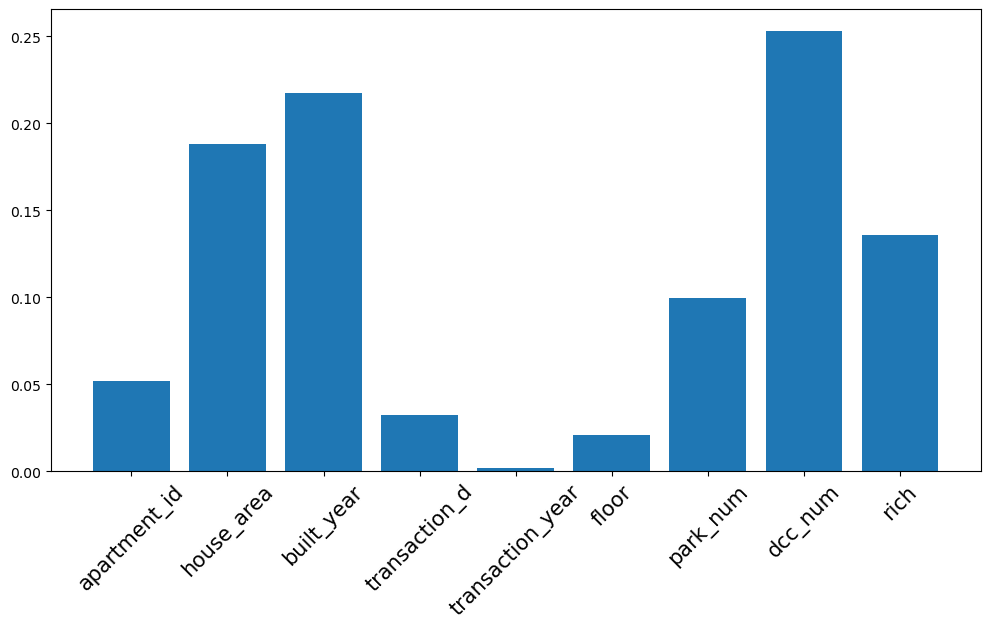

In [20]:
plt.figure(figsize=(12,6))
plt.bar(x=train_cols, height=np.mean(feature_importance, axis=0))
plt.xticks(fontsize=15, rotation=45)
plt.show()

# 5. Make submission

In [21]:
pred_test = np.mean(test_pred, axis=0)

In [22]:
pd.DataFrame({'index':test['index'].values, 'PRICE':pred_test}).to_csv('submission.csv', index=False)